# Implementing Decision Function of SVM RBF Kernel

We will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value returned by ```decision_function()``` model will classify the data point either as positive or negative

In Kernel SVM after traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation

In [120]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [121]:
# create a dataset
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [122]:
X.shape, y.shape

((5000, 5), (5000,))

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on our requirement we can pass any other parameters </i>


#### 1. Split the data into  Xtrain (60),  Xcv (20),  Xtest (20)

In [123]:
# split train, test and cv data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4, random_state=42)
Xcv,Xtest, ycv, ytest = train_test_split(Xtest, ytest, test_size = 0.5, stratify=ytest, random_state=43)

#### 2. Train  SVC(gamma=0.001,C=100.)  on the ( Xtrain ,  ytrain )

In [124]:
# fit the data
clf = SVC(kernel='rbf',gamma=0.001, C=100)
clf.fit(Xtrain, ytrain)

SVC(C=100, gamma=0.001)

#### 3. Get the decision boundry values  fcv  on the  Xcv  data i.e.  fcv  = decision_function( Xcv ) you need to implement this decision_function()

In [125]:
# values of yi alphai and intercept from the trained model
b = clf._intercept_ # Intercept
x_sv = clf.support_vectors_ # support vectors xq, xi
yi_alphai = clf._dual_coef_ # yi & alphai
gamma = 0.001

In [126]:
# custom rbf kernel
def kernel(X, sv, gamma):
    # initializing matrix with zeros
    rbf = np.zeros(shape=(X.shape[0], sv.shape[0]))
    # for every point in dataset
    for i, xq in enumerate(X):
        # for every point in support vectors
        for j, xi in enumerate(sv): 
            # rbf formula
            # K(xi,xq) =  exp(−γ||xi−xq||2)
            #   temp = np.linalg.norm(xi - xq)**2
            temp = np.linalg.norm(xi - xq)**2
            res = np.exp(-gamma * temp)
            # at ij th position place rbf value
            rbf[i][j] = res
    return rbf

In [127]:
def decision_function(X, sv, yi_alphai_, intercept, gamma):
    # sum of all vectors * (yi * alphai * K * (xi * xq)) + intercept
    K = kernel(X, sv, gamma)
    # for np.sum() as it was giving single value
    # code source: https://stackoverflow.com/questions/40200070/what-does-axis-0-do-in-numpys-sum-function
    decision = -(np.sum(yi_alphai_ * K, axis=-1) + intercept)
    return decision

In [128]:
fcv = decision_function(Xcv, x_sv, yi_alphai, b, gamma)

In [129]:
fcv

array([-2.74089896e+00, -1.15878192e-01, -2.87230861e+00, -2.59081966e-01,
       -2.28175556e+00, -8.53433435e-01, -1.95117260e+00, -3.00252577e+00,
       -1.93410742e+00, -1.15173585e+00, -2.28248336e+00,  2.05182327e+00,
        1.58894024e+00, -1.98229211e+00, -5.58155394e-01, -1.61582483e+00,
       -1.97840469e+00, -3.59152473e+00, -1.89339287e+00, -2.99713322e+00,
       -2.21794832e+00, -1.81756178e+00,  1.77577980e+00, -2.38121828e-01,
        1.23346888e+00, -2.61216146e+00,  2.34848980e-01, -2.90993002e+00,
       -2.20336036e+00, -1.29576516e+00, -2.66779758e+00, -5.29483724e+00,
       -9.53896492e-01, -2.86476077e+00, -2.99306948e+00, -9.16084212e-01,
       -2.36120078e+00, -2.49633212e+00, -3.82011792e+00, -2.33145222e+00,
        9.37506327e-01, -3.39544173e+00, -8.84867047e-01,  9.91353116e-01,
        9.35503028e-01, -6.16951395e-01, -4.53609704e+00, -2.44588475e+00,
        1.79860602e-02, -1.52707034e+00, -2.00323940e+00, -9.73227962e-01,
        1.42571565e+00, -

In [130]:
clf.decision_function(Xcv)

array([-2.74089896e+00, -1.15878192e-01, -2.87230861e+00, -2.59081966e-01,
       -2.28175556e+00, -8.53433435e-01, -1.95117260e+00, -3.00252577e+00,
       -1.93410742e+00, -1.15173585e+00, -2.28248336e+00,  2.05182327e+00,
        1.58894024e+00, -1.98229211e+00, -5.58155394e-01, -1.61582483e+00,
       -1.97840469e+00, -3.59152473e+00, -1.89339287e+00, -2.99713322e+00,
       -2.21794832e+00, -1.81756178e+00,  1.77577980e+00, -2.38121828e-01,
        1.23346888e+00, -2.61216146e+00,  2.34848980e-01, -2.90993002e+00,
       -2.20336036e+00, -1.29576516e+00, -2.66779758e+00, -5.29483724e+00,
       -9.53896492e-01, -2.86476077e+00, -2.99306948e+00, -9.16084212e-01,
       -2.36120078e+00, -2.49633212e+00, -3.82011792e+00, -2.33145222e+00,
        9.37506327e-01, -3.39544173e+00, -8.84867047e-01,  9.91353116e-01,
        9.35503028e-01, -6.16951395e-01, -4.53609704e+00, -2.44588475e+00,
        1.79860602e-02, -1.52707034e+00, -2.00323940e+00, -9.73227962e-01,
        1.42571565e+00, -

# Implementing Platt Scaling to find P(Y==1|X)

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


 Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 


For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as mentioned in the above step

In [131]:
def sigmoid(x, w, b):
  # compute sigmoid(z) and return
  z = np.dot(x, w.T) + b
  res = 1/(1+np.exp(-z))
  return res

In [132]:
def logloss(y_true, y_pred):
    loss = -1*np.sum(np.mean(y_true*np.log10(y_pred) + (1-y_true)*np.log10(1-y_pred)))
    return loss

In [133]:
def initialize_weights(row_vector):
    w = np.zeros_like(row_vector,)
    b = 0
    return w,b

In [134]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for p in range(N):
        predict.append(sigmoid(X[p], w, b))
    return np.array(predict)

In [135]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw = x * (y - sigmoid(x, w, b)) - (alpha/N)*w
    return dw

In [136]:
def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    db = y - sigmoid(x, w, b)
    return db

In [137]:
def update_Y(y_cv, y_train):
    '''In this function we will update the y_cv values postive and negative'''
    N_positive = list(y_train).count(1)
    N_negative = list(y_train).count(0)
    y_positive = (N_positive + 1)/(N_positive + 2)
    y_negative = 1/(N_negative + 2)
    updated_y = []
    for i in y_cv:
        if i == 1:
            updated_y.append(y_positive)
        else:
            updated_y.append(y_negative)
    return np.array(updated_y)

In [138]:
# train function
def train(fcv, updated_y, epochs, alpha, eta0):
    N = len(fcv)    
    train_loss = []
    w,b = initialize_weights(fcv[0]) # Initialize the weight
    for epoch in range(epochs):
        for i, j in zip(fcv, updated_y):
            dw = gradient_dw(i,j,w,b,alpha,N) #computing gradient w.r.t w
            db = gradient_db(i,j,w,b) #computing gradient w.r.t b
            w = w + (eta0 * dw) #updating w
            b = b + (eta0 * db) #updating b
        train_pred = pred(w, b, fcv) #predicting based on X_train data
        loss_y = logloss(updated_y, train_pred) #computing log loss
        train_loss.append(loss_y)

    return w, b, train_loss

In [139]:
eta0 = 0.0001
alpha = 0.0001
epochs = 50

In [140]:
updated_y = update_Y(ycv, ytrain)

In [141]:
w_opt, b_opt, train_loss = train(fcv, updated_y, epochs, alpha, eta0)

In [142]:
epoch_list = [i for i in range(0, epochs)]

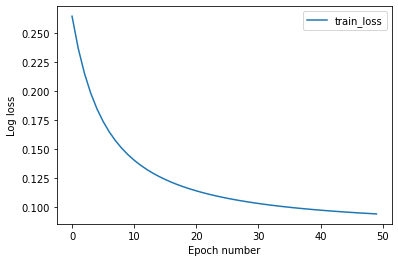

In [143]:
plt.plot(epoch_list, train_loss, label = "train_loss")
plt.xlabel("Epoch number")
plt.ylabel("Log loss")
plt.legend()
plt.show()

In [144]:
print("Optimized w : {} \nOptimized b : {}".format(w_opt, b_opt))

Optimized w : 1.192988781373484 
Optimized b : -0.14214953069887126


In [145]:
f_test = decision_function(Xtest, x_sv, yi_alphai, b_opt, gamma)

In [146]:
proba = sigmoid(f_test, w_opt, b_opt)
for prob in proba:
    print(prob)

0.971510664528425
0.9965607194216016
0.9821937279916909
0.9402772038090331
0.9998038207041273
0.9673849548952543
0.9999178523143737
0.9805060677355608
0.9373905913254625
0.9990861667250605
0.9498824751860641
0.9486458341587416
0.8729873756038913
0.9998287087906349
0.9537924013269781
0.960490144266169
0.9974251994876691
0.7810637490230232
0.9446685171336714
0.9877535480554087
0.9400983375783314
0.9665919710461669
0.9998837036666
0.998390014717584
0.9977214005240539
0.7529916223210503
0.9714772413258591
0.9708238629229885
0.9629301157483984
0.9995654544035925
0.9604970359106928
0.9948833693811504
0.9999235225761604
0.9991107766105825
0.9880384608490128
0.9950521162828969
0.9997967721496407
0.9906779238769648
0.9867950632496758
0.9526481870194016
0.9996659353351337
0.9968382531893358
0.9996236382916199
0.9137584914899791
0.9998072542764822
0.9822942646533688
0.997279031814439
0.9992744960211054
0.9447695733005593
0.9997012553288913
0.979180442879178
0.9997791075374404
0.9979353490898747
0